In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
np.random.seed(42 )

In [23]:
#dogs have higher ear flapiness index, lower whisker length
dogs_whisker_length= np.random.normal(loc=5, scale=1,size=10)
dogs_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)

In [24]:
#cats have lower ear flappiness index and higher whisker length
cats_whisker_length=np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)


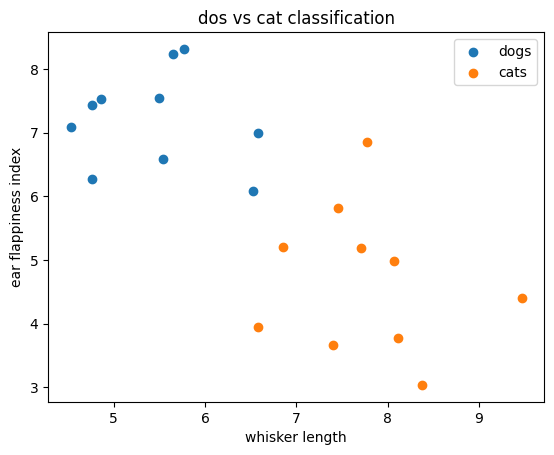

In [25]:
#plot the data points
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='cats')
plt.xlabel('whisker length')
plt.ylabel('ear flappiness index')
plt.title('dos vs cat classification')
plt.legend()
plt.show()


In [26]:
#implementing random linear classifier algo
def random_linear_classification(data_dogs,data_cats,k,d):
    best_error=float('inf')
    best_theta=None
    best_theta0=None

    for i in range(k):
        theta=np.random.normal(size=d)
        theta0=np.random.normal()

        error=compute_error(data_dogs, data_cats,theta,theta0)

        if error<best_error:
            best_error=error
            best_theta=theta
            best_theta0=theta0
    return best_theta,best_theta0 

In [27]:
def compute_error(data_dogs,data_cats,theta,theta0):
    error=0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog)+theta0 <=0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat)+theta0>0:
            error+=1
    return error


In [28]:
#prepare data for algo
dogs_data=np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

In [29]:
dogs_data


array([[5.49671415, 7.53658231],
       [4.8617357 , 7.53427025],
       [5.64768854, 8.24196227],
       [6.52302986, 6.08671976],
       [4.76584663, 6.27508217],
       [4.76586304, 7.43771247],
       [6.57921282, 6.98716888],
       [5.76743473, 8.31424733],
       [4.53052561, 7.09197592],
       [5.54256004, 6.5876963 ]])

In [30]:
cats_data

array([[9.46564877, 4.39829339],
       [7.7742237 , 6.85227818],
       [8.0675282 , 4.98650278],
       [6.57525181, 3.94228907],
       [7.45561728, 5.82254491],
       [8.11092259, 3.77915635],
       [6.84900642, 5.2088636 ],
       [8.37569802, 3.04032988],
       [7.39936131, 3.67181395],
       [7.70830625, 5.19686124]])

In [31]:
#runnning random linear classifier algo
k=100 #number of interations
d=2 #number of features
best_theta, best_theta0=random_linear_classification(dogs_data,cats_data,k,d)

In [32]:
best_theta

array([-0.676922  ,  0.61167629])

In [33]:
best_theta0

1.030999522495951

In [35]:
x_vals=np.linspace(2,10,100)
y_vals=(-best_theta[0]/best_theta[1])*x_vals-(best_theta0/best_theta[1])

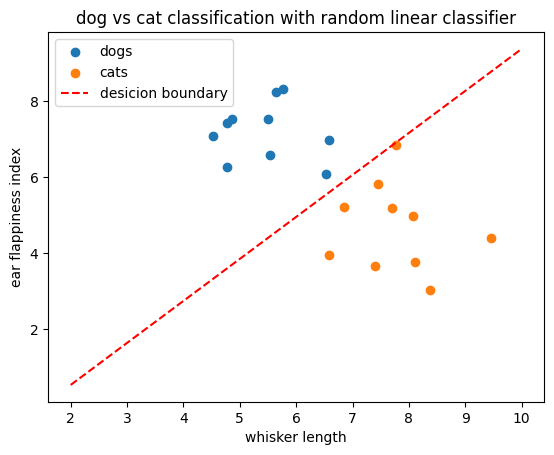

In [36]:
#plot the decision boundary 
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='cats')
plt.plot(x_vals,y_vals,color='red',linestyle='--',label='desicion boundary')
plt.xlabel('whisker length')
plt.ylabel('ear flappiness index')
plt.title('dog vs cat classification with random linear classifier')
plt.legend()
plt.show()